In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('sales.csv')

In [3]:
data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [4]:
data.shape

(640840, 10)

In [5]:
index_df=data['Unnamed: 0']

In [7]:
data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [8]:
data=data.drop(['Unnamed: 0'], axis=1)

In [9]:
cols = []
for colname in data.columns:
    cols.append(colname.lower())
data.columns = cols

In [10]:
data.dtypes

store_id                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [11]:
data['year'] = data.date.str[:4].astype("object")
data['month'] = data.date.str[5:7].astype("object")
data = data.drop(['date'], axis = 1)

In [12]:
data['day_of_week']=data['day_of_week'].astype('object')
data['open']=data['open'].astype('object')
data['promotion']=data['promotion'].astype('object')
data['school_holiday']=data['school_holiday'].astype('object')

In [13]:
correlations_matrix = data.corr()
correlations_matrix

,store_id,nb_customers_on_day,sales
store_id,1.000000,0.023605,0.004804
nb_customers_on_day,0.023605,1.000000,0.894872
sales,0.004804,0.894872,1.000000


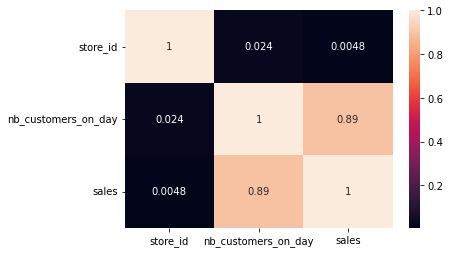

In [14]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [15]:
y=data['sales']
X=data.drop('sales', axis=1)

In [16]:
y.shape

(640840,)

In [17]:
X_num = data.select_dtypes(np.number) 
X_cat = data.select_dtypes(np.object)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_4700/1784080183.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = data.select_dtypes(np.object)


In [18]:
X_cat

,day_of_week,open,promotion,state_holiday,school_holiday,year,month
0,4,1,0,0,0,2013,04
1,6,1,0,0,0,2015,04
2,4,1,1,0,0,2013,08
3,2,1,1,0,0,2013,05
4,4,1,1,0,0,2013,10
...,...,...,...,...,...,...,...
640835,6,1,0,0,0,2013,10
640836,1,1,1,0,0,2014,04
640837,1,1,0,0,0,2014,07
640838,4,1,0,0,0,2014,06


In [19]:
X_num.head()

,store_id,nb_customers_on_day,sales
0,366,517,4422
1,394,694,8297
2,807,970,9729
3,802,473,6513
4,726,1068,10882


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols=[]
for row in encoder.categories_:
    for col_name in row[1::]:
        cols.append(col_name)
cols=encoder.get_feature_names(input_features=X_cat.columns)
X_cat_encode=pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)
X_cat_encode.head()

C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,open_1,promotion_1,state_holiday_a,state_holiday_b,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
X_num.head()

,store_id,nb_customers_on_day,sales
0,366,517,4422
1,394,694,8297
2,807,970,9729
3,802,473,6513
4,726,1068,10882


In [24]:
X_cat_encode.tail()

,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,open_1,promotion_1,state_holiday_a,state_holiday_b,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
640835,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
640836,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
640838,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
640839,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_num.shape

(640840, 3)

In [26]:
X=pd.concat([X_num, X_cat_encode], axis=1)

In [27]:
X.shape

(640840, 28)

In [28]:
X['unnamed: 0']=index_df

In [29]:
X.set_index('unnamed: 0')

,store_id,nb_customers_on_day,sales,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,open_1,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
425390,366,517,4422,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291687,394,694,8297,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411278,807,970,9729,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
664714,802,473,6513,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540835,726,1068,10882,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,409,483,4553,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152315,97,987,12307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,987,925,6800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X=X.drop(['sales'], axis=1)

In [31]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
X_train.columns

Index(['store_id', 'nb_customers_on_day', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'open_1', 'promotion_1', 'state_holiday_a', 'state_holiday_b',
       'state_holiday_c', 'school_holiday_1', 'year_2014', 'year_2015',
       'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07',
       'month_08', 'month_09', 'month_10', 'month_11', 'month_12',
       'unnamed: 0'],
      dtype='object')

In [33]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [193]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10,
                             max_features = 6)
model = regr.fit(X_train_scaled, y_train)

In [194]:
predict=model.predict(X_test_scaled)

In [195]:
display(predict)

array([ 5616.45818003,  6202.99014778,  5866.05345212, ...,
       16993.35      ,  5616.45818003,  6185.72964169])

In [196]:
for pred in range(len(predict)):
    predict[pred]=predict[pred]*X_test_scaled.loc[pred,'open_1']

In [197]:
print("train data R2 score was: ",regr.score(X_train_scaled, y_train))
print("test data R2 score was: ",regr.score(X_test_scaled, y_test))

train data R2 score was:  0.8505466043930312
test data R2 score was:  0.8492060227528586


In [198]:
X['unnamed: 0']=index_df

In [199]:
np.sqrt(mean_squared_error(y_test, predict))

1496.4603484970219

In [55]:
data2 = pd.read_csv('validation_for_students.csv')

In [56]:
cols = []
for colname in data2.columns:
    cols.append(colname.lower())
data2.columns = cols

In [57]:
data2.head()

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [58]:
index_df=data2['true_index']
data2=data2.drop(['true_index'], axis=1)
data2['year'] = data2.date.str[:4].astype("object")
data2['month'] = data2.date.str[5:7].astype("object")
data2 = data2.drop(['date'], axis = 1)

data2['day_of_week']=data2['day_of_week'].astype('object')
data2['open']=data2['open'].astype('object')
data2['promotion']=data2['promotion'].astype('object')
data2['school_holiday']=data2['school_holiday'].astype('object')
X_num = data2.select_dtypes(np.number) 
X_cat = data2.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols=[]
for row in encoder.categories_:
    for col_name in row[1::]:
        cols.append(col_name)
cols=encoder.get_feature_names(input_features=X_cat.columns)
X_cat_encode=pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)
X_cat_encode.head()

X=pd.concat([X_num, X_cat_encode], axis=1)
X['Unnamed: 0']=index_df
X.set_index('Unnamed: 0')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9084/3864352121.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = data2.select_dtypes(np.object)
C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,store_id,nb_customers_on_day,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,open_1,promotion_1,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7,764,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,22,449,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,1087,622,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45,139,314,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
56,568,356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712004,217,633,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
712018,604,743,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
712020,1021,1852,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X['unnamed: 0']=index_df

In [60]:
X.set_index('unnamed: 0')

,store_id,nb_customers_on_day,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,open_1,promotion_1,...,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,Unnamed: 0
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7,764,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7
19,22,449,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
31,1087,622,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31
45,139,314,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45
56,568,356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712004,217,633,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712004
712018,604,743,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712018
712020,1021,1852,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,712020


In [61]:
X=X.drop(['Unnamed: 0'], axis=1)

In [62]:
X.columns

Index(['store_id', 'nb_customers_on_day', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'open_1', 'promotion_1', 'state_holiday_a', 'state_holiday_b',
       'state_holiday_c', 'school_holiday_1', 'year_2014', 'year_2015',
       'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07',
       'month_08', 'month_09', 'month_10', 'month_11', 'month_12',
       'unnamed: 0'],
      dtype='object')

In [63]:
# ['store_ID', 'nb_customers_on_day', 'sales', 'day_of_week_2',
#        'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
#        'day_of_week_7', 'open_1', 'promotion_1', 'state_holiday_a',
#        'state_holiday_b', 'state_holiday_c', 'school_holiday_1', 'year_2014',
#        'year_2015', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06',
#        'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12',
#        'Unnamed: 0'],

In [64]:
XX_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [65]:
predict_test=model.predict(XX_scaled)

In [66]:
predict_test

array([    0.        ,  4561.57781485,  5908.13092293, ...,
       16650.43564356,     0.        ,  4184.2830668 ])

In [67]:
predict_df=pd.DataFrame(predict_test)

In [68]:
result=pd.concat([index_df, predict_df], axis=1)

In [69]:
result

,true_index,0
0,7,0.000000
1,19,4561.577815
2,31,5908.130923
3,45,3573.034483
4,56,4184.283067
...,...,...
71200,712004,7332.796298
71201,712018,7078.962591
71202,712020,16650.435644
71203,712023,0.000000


In [70]:
result.set_index('true_index')

,0
true_index,
7,0.000000
19,4561.577815
31,5908.130923
45,3573.034483
56,4184.283067
...,...
712004,7332.796298
712018,7078.962591
712020,16650.435644


In [71]:
result = result.rename(columns={'true_index':'index',
                            0:'sales'})

In [72]:
result.columns

Index(['index', 'sales'], dtype='object')

In [89]:
result

,index,sales
0,7,0.000000
1,19,4506.957134
2,31,6187.366724
3,45,3234.554154
4,56,3778.645497
...,...,...
71200,712004,6553.458593
71201,712018,7981.858688
71202,712020,15630.743284
71203,712023,0.000000


In [77]:
result.to_csv('DecTreeDT_3Amigos.csv', index=False)

In [78]:
d=pd.read_csv('DecTreeDT_3Amigos.csv')

In [79]:
d.head()

,index,sales
0,7,0.000000
1,19,4561.577815
2,31,5908.130923
3,45,3573.034483
4,56,4184.283067
